<a href="https://colab.research.google.com/github/scss-2022/SanjeevChauhan/blob/main/Assign2_SI_2nd_Sem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
print('Training data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)
print('Shape Label',y_train.shape,y_test.shape)

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Shape Label (50000, 1) (10000, 1)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


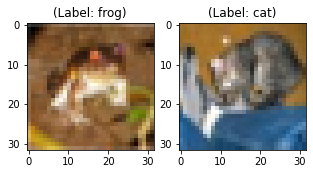

In [ ]:
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

In [ ]:
np.min(x_train),np.max(x_train)


(0.0, 1.0)

In [ ]:
x_train = x_train/255.0
np.min(x_train),np.max(x_train)

(0.0, 1.5378700499807765e-05)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
#Creating a Data Frames
# Reshape the image
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (50000, 3073)


In [ ]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel3033,pixel3034,pixel3035,pixel3036,pixel3037,pixel3038,pixel3039,pixel3040,pixel3041,pixel3042,pixel3043,pixel3044,pixel3045,pixel3046,pixel3047,pixel3048,pixel3049,pixel3050,pixel3051,pixel3052,pixel3053,pixel3054,pixel3055,pixel3056,pixel3057,pixel3058,pixel3059,pixel3060,pixel3061,pixel3062,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.000004,0.000004,3.799444e-06,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000004,0.000003,0.000003,0.000006,0.000004,0.000003,0.000007,0.000005,0.000004,0.000008,0.000006,0.000005,0.000009,0.000007,4.824690e-06,0.000009,0.000007,5.367468e-06,0.000009,0.000007,0.000006,0.000008,0.000006,4.643764e-06,0.000008,0.000006,0.000005,0.000009,0.000007,0.000005,0.000009,...,8.925677e-06,6.211789e-06,4.643764e-06,9.709689e-06,6.332406e-06,4.161295e-06,8.684443e-06,5.729320e-06,3.316975e-06,0.000007,0.000005,0.000004,0.000007,0.000005,0.000003,0.000008,0.000006,0.000004,0.000007,0.000005,0.000004,0.000006,0.000004,0.000003,0.000006,0.000005,0.000003,0.000010,0.000008,0.000006,0.000013,0.000011,0.000008,0.000009,0.000007,0.000005,0.000007,0.000006,0.000004,6
1,0.000009,0.000011,1.127771e-05,0.000008,0.000008,0.000008,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006,0.000008,0.000008,0.000008,0.000009,0.000010,0.000011,0.000010,0.000011,0.000013,0.000011,0.000012,1.290605e-05,0.000009,0.000009,9.408146e-06,0.000007,0.000007,0.000007,0.000006,0.000006,5.910246e-06,0.000007,0.000006,0.000006,0.000007,0.000007,0.000007,0.000008,...,3.015431e-07,3.618518e-07,6.633949e-07,3.618518e-07,3.618518e-07,6.633949e-07,6.030863e-07,5.427777e-07,7.237036e-07,0.000002,0.000001,0.000001,0.000003,0.000003,0.000003,0.000004,0.000004,0.000004,0.000005,0.000005,0.000006,0.000007,0.000007,0.000007,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000009,0.000008,0.000008,0.000009,0.000008,0.000009,0.000009,0.000008,0.000009,9
2,0.000015,0.000015,1.537870e-05,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,1.525808e-05,0.000015,0.000015,1.525808e-05,0.000015,0.000015,0.000015,0.000015,0.000015,1.525808e-05,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,0.000015,...,4.583456e-06,5.427777e-06,5.427777e-06,4.342221e-06,5.186542e-06,5.186542e-06,3.859752e-06,4.704073e-06,4.704073e-06,0.000004,0.000005,0.000005,0.000004,0.000005,0.000005,0.000004,0.000005,0.000005,0.000003,0.000004,0.000004,0.000003,0.000004,0.000004,0.000003,0.000004,0.000004,0.000004,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,9
3,0.000002,0.000002,6.030863e-07,0.000002,0.000002,0.000001,0.000002,0.000002,0.000001,0.000003,0.000002,0.000001,0.000003,0.000002,0.000002,0.000002,0.000002,0.000001,0.000002,0.000002,0.000001,0.000001,0.000001,5.427777e-07,0.000002,0.000002,9.046294e-07,0.000003,0.000002,0.000001,0.000002,0.000001,6.030863e-07,0.000002,0.000002,0.000001,0.000002,0.000002,0.000001,0.000003,...,7.357653e-06,5.970554e-06,4.040678e-06,6.453023e-06,5.126233e-06,3.256666e-06,6.754566e-06,5.789628e-06,3.980370e-06,0.000006,0.000005,0.000003,0.000005,0.000004,0.000002,0.000006,0.000005,0.000004,0.000005,0.000004,0.000003,0.000005,0.000005,0.000003,0.000005,0.000005,0.000003,0.000004,0.000003,0.000002,0.000003,0.000003,0.000002,0.000004,0.000003,0.000002,0.000004,0.000004,0.000003,4
4,0.000010,0.000011,1.194111e-05,0.000010,0.000011,0.000012,0.000011,0.000011,0.000012,0.000011,0.000012,0.000013,0.000011,0.000012,0.000013,0.000011,0.000012,0.000013,0.000011,0.000012,0.000013,0.000011,0

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

In [ ]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-0.000098,4.196907e-05,6
1,0.000013,-1.460889e-05,9
2,0.000119,-1.771950e-04,9
3,-0.000159,1.651375e-07,4
4,-0.000040,-7.642045e-05,1


In [ ]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variation per principal component: [0.2907663  0.11253144]


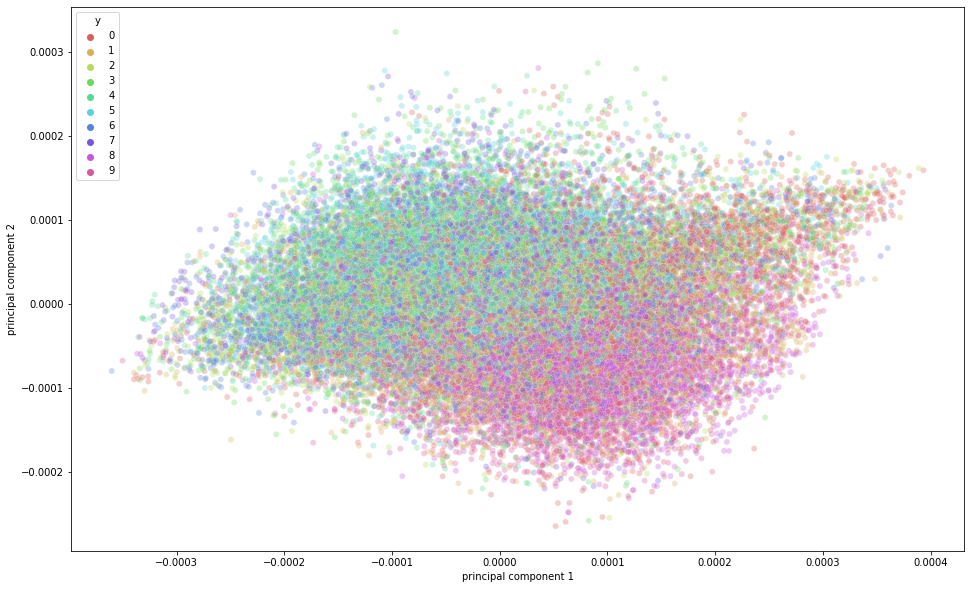

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

In [ ]:
x_test = x_test/255.0
x_test = x_test.reshape(-1,32,32,3)
#Reshape 
x_test_flat = x_test.reshape(-1,3072)

In [ ]:
pca = PCA(0.9)

In [ ]:
pca.fit(x_train_flat)

In [43]:
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
pca.n_components_

99

In [44]:
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
#from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop

In [48]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
batch_size = 128
num_classes = 10
epochs = 20

In [61]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(99,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1024)              102400    
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 1,810,698
Trainable params: 1,810,698
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [76]:
#history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(test_img_pca, y_test))